In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import squarify
import datetime as dt # Para las variables de tiempo
from datetime import datetime, date, time, timedelta
import seaborn as sns; sns.set()
import parser as parser
from io import StringIO
from math import pi
import kiwisolver

In [2]:
f = lambda s: datetime.datetime.strptime(s,'%d-%m-%Y-%H-%M-%S')


In [3]:
df_meses = pd.read_csv("BBDD_BSD.csv", sep=';', low_memory = False, date_parser = f,encoding='utf-8-sig')
df_meses.head(5)

,ID,Conversion_date_hour,Conversion_label,Site_Offer
0,IDE-02381230,1-10-18 0:00,14_Fin_proceso,evobanco.com
1,-,1-10-18 0:00,1_Email_movil,EVOBanco_Google_Adwords_GDN
2,IDE-02381234,1-10-18 0:00,12_Identificacion_iban,Kelisto_Aff
3,-,1-10-18 0:00,1_Email_movil,Kelisto_Aff
4,IDE-02381230,1-10-18 0:00,15_Descarga_documentacion,evobanco.com


Se obtienen la cantidad de pasos por canal

In [4]:
df_meses_by_canal = df_meses.groupby(['Site_Offer'])['Conversion_label'].agg(['count'])
df_meses_by_canal = df_meses_by_canal.sort_values(by= 'count', ascending = False).reset_index()
df_meses_by_canal.head(17)

,Site_Offer,count
0,Kelisto_Aff,460222
1,evobanco.com,212542
2,EVOBanco_Google_Adwords_SEM,33560
3,LleidaNet,21376
4,-,6843
5,EVO,4251
6,EVOBanco_Google_Adwords_GDN,3009
7,appspot.com,1190
8,Rankia_Aff,1030
9,Rankia__,842


Para los que tienen pocos lead y no descuadre los junto todos en una categoria

In [5]:
df_meses_by_canal.sort_values(by = 'count', ascending = True).head(17)

,Site_Offer,count
18,Kelisto_DMK,1
17,Inmocrowd,2
16,yandex.ru,3
15,Weborama,4
14,Kelisto__,4
13,Nurturing SMS,74
12,Direct access,151
11,evobanco.es,169
10,Rastreator_Aff,358
9,Rankia__,842


La columna new_channel contiene el valor other,es decie aquellos que contengan un porcentaje inferior al 0.5%

In [7]:
total_lead = df_meses['Site_Offer'].count()

df_meses_by_canal['porcentaje'] = df_meses_by_canal['count'].apply(lambda count: count / total_lead * 100)
df_meses_by_canal['new_channel'] = df_meses_by_canal.apply(lambda row: 'Other' if row['porcentaje'] < 0.5 else row['Site_Offer'], axis = 1)

In [8]:
df_meses_by_canal.head(17)

,Site_Offer,count,porcentaje,new_channel
0,Kelisto_Aff,460222,61.722487,Kelisto_Aff
1,evobanco.com,212542,28.504984,evobanco.com
2,EVOBanco_Google_Adwords_SEM,33560,4.500886,EVOBanco_Google_Adwords_SEM
3,LleidaNet,21376,2.866834,LleidaNet
4,-,6843,0.917746,-
5,EVO,4251,0.570121,EVO
6,EVOBanco_Google_Adwords_GDN,3009,0.403551,Other
7,appspot.com,1190,0.159596,Other
8,Rankia_Aff,1030,0.138138,Other
9,Rankia__,842,0.112924,Other


Se agrupan las conversiones por mes

In [9]:
df_meses['Conversion_date_hour_datetime'] = pd.to_datetime(df_meses['Conversion_date_hour'])

In [10]:
df_meses['Conversion_date_hour_month'] = df_meses['Conversion_date_hour_datetime'].apply(lambda Conversion_date_hour_datetime: Conversion_date_hour_datetime.strftime("%Y-%m") if pd.notnull(Conversion_date_hour_datetime) else Conversion_date_hour_datetime)
df_meses_by_month = df_meses.groupby(['Conversion_date_hour_month'])['ID'].agg(['count']).reset_index()
df_meses_by_month.head(4)

,Conversion_date_hour_month,count
0,2018-01,14250
1,2018-02,14054
2,2018-03,16109
3,2018-04,15076


[]

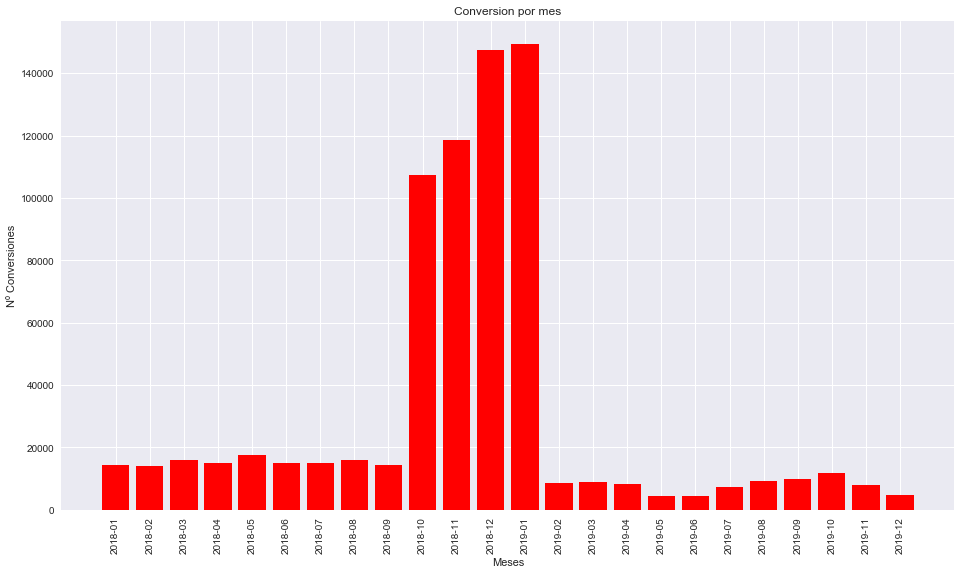

In [11]:
x = df_meses_by_month['Conversion_date_hour_month']
y = df_meses_by_month['count']

fig, ax =  plt.subplots(figsize=(16, 9))

ax.bar(x, y, color = 'red')
ax.set_title('Conversion por mes')
ax.set_xlabel('Meses')
ax.set_ylabel('Nº Conversiones')

plt.xticks(rotation = 90)
plt.plot()

Cambio el formato de la columna 'Conversion_date_hour'

In [13]:
df_meses['Conversion_date_hour'] = pd.to_datetime(df_meses['Conversion_date_hour'], errors='raise', box = True)

Se filtra la variedad de canales

In [14]:
canales = df_meses['Site_Offer'].value_counts()

Se realiza un grafico de barras de la cantidad de canales 

Text(0,0.5,'Cantidad por canal')

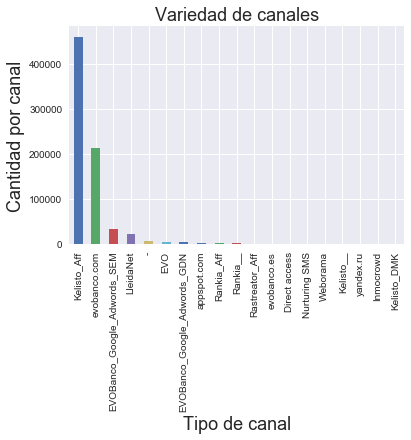

In [15]:
canales.plot(kind='bar')
plt.title('Variedad de canales', fontsize = 18)
plt.xlabel('Tipo de canal', fontsize = 18)
plt.ylabel('Cantidad por canal', fontsize = 18)

Se saca la cantidad de pasos que realizan los cliente por lead

In [19]:
canalesXlead = df_meses[['Site_Offer','Conversion_label']].dropna()

In [20]:
canalesXleads = canalesXlead[(canalesXlead['Conversion_label'] != 'Unknown') & (canalesXlead['Site_Offer'])]

In [21]:
df2 = (canalesXleads.groupby('Conversion_label')['Site_Offer'].agg({'Site_Offer' : 'count'}))
df2

C:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Site_Offer
Conversion_label,
0.WELCOME,17
12_Identificacion_iban,30788
13_Identificacion_iban_fotos,354
14_Fin_proceso,15903
15_Descarga_documentacion,20189
16_ContratacionOK,12975
1_Email_movil,366598
2_Confirmacion_OTP,56562
3_Datos_personales,74455


In [22]:
df3 = df2.reset_index()

df3["Site_Offer_log"] = np.log(df3["Site_Offer"]+1)

Text(0,0.5,'Pasos')

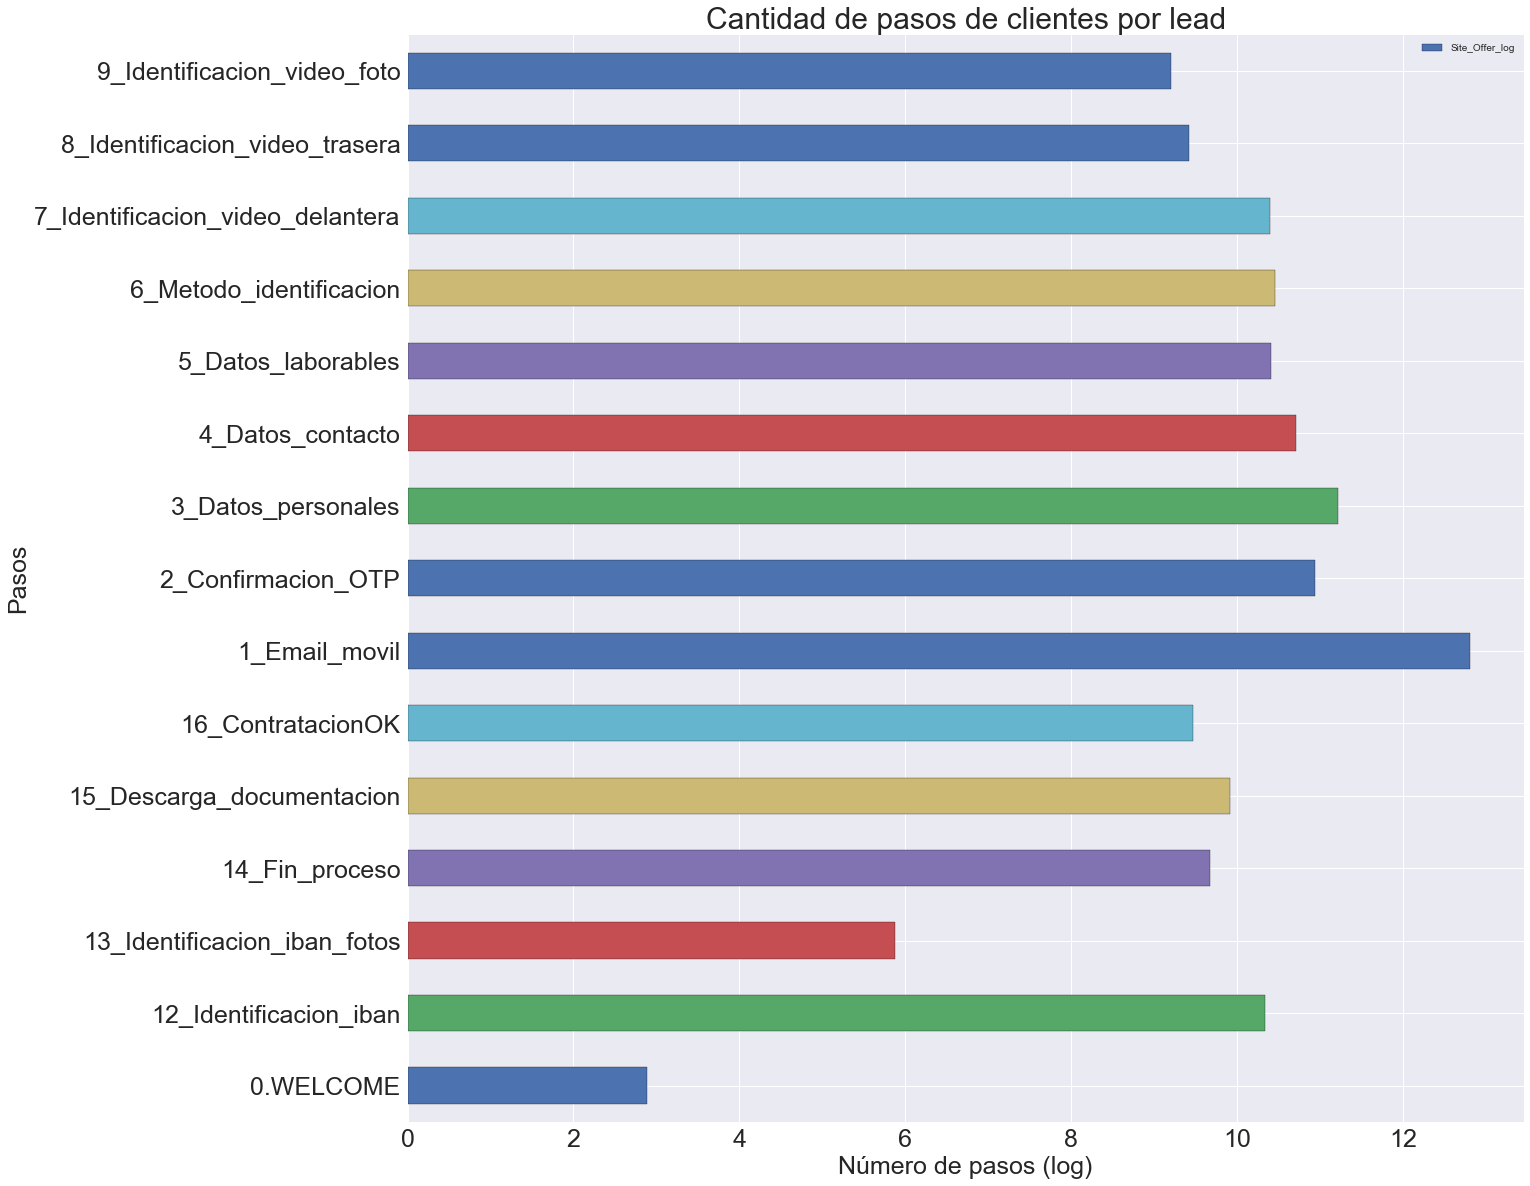

In [25]:
# Ploteo la cantidad de canales por lead
g = df3.plot.barh(x='Conversion_label', y='Site_Offer_log',fontsize = 25,figsize=(20, 20), edgecolor='k')

plt.title('Cantidad de pasos de clientes por lead', fontsize = 30)
plt.xlabel('Número de pasos (log)', fontsize = 25)
plt.ylabel('Pasos', fontsize = 25)

Se seleccionan las columnas relevantes para obtener la conversión por canal

In [26]:
models = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK') & (df_meses['Site_Offer'] != 'NaN')]

Se obtine el número total de conversiones por canal

In [27]:
conversionesForSite = models.groupby('Site_Offer')['Conversion_label'].agg({'Conversion_label' : 'count'})

C:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Seleccionamos los cinco canales con mayor conversión

In [28]:
conv = conversionesForSite.sort_values(by='Conversion_label', ascending=False).head(5).reset_index()

Se pasa a Dataframe y plotea los cinco canales seleccionado previamente

Text(0.5,0,'Conversiones')

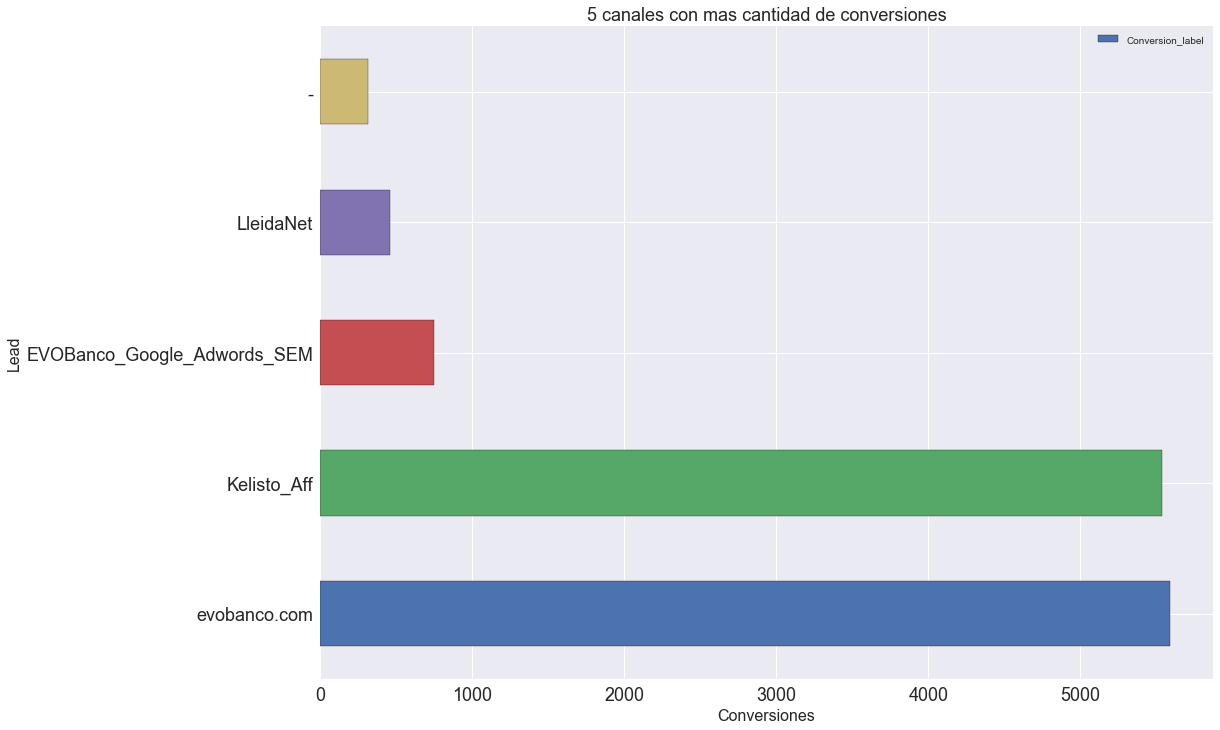

In [29]:
df = pd.DataFrame(data=conv)

g = df.plot.barh(x='Site_Offer', y='Conversion_label',fontsize = 18, figsize=(16, 12), edgecolor='k')

plt.title('5 canales con mas cantidad de conversiones', fontsize = 18)
plt.ylabel('Lead', fontsize = 16)
plt.xlabel('Conversiones', fontsize = 16)

Se calcula la tasa de conversion día

In [30]:
df_meses['Conversion_date_hour'].dt.day.value_counts().sort_index()

1     88881
10    57826
11    55819
12    75304
13    21925
14    24964
15    26189
16    26286
17    27790
18    30281
19    24605
20    24245
21    25925
22    26822
23    26034
24    22986
25    20553
26    23814
27    23565
28    24479
29    23977
30    25822
31    17539
Name: Conversion_date_hour, dtype: int64

Se agrega columnas por separado

In [31]:
df_meses['dia'] =  df_meses['Conversion_date_hour'].dt.day
df_meses['mes'] =  df_meses['Conversion_date_hour'].dt.month

Se calcula la conversión neta por mes

In [32]:
octubre = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK') & (df_meses['mes'] == 10)]
octubre.groupby('mes')['Conversion_label'].value_counts()

mes  Conversion_label 
10   16_ContratacionOK    2301
Name: Conversion_label, dtype: int64

In [33]:
noviembre = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK') & (df_meses['mes'] == 11)]
noviembre.groupby('mes')['Conversion_label'].value_counts()

mes  Conversion_label 
11   16_ContratacionOK    2434
Name: Conversion_label, dtype: int64

In [34]:
diciembre = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK') & (df_meses['mes'] == 12)]
diciembre.groupby('mes')['Conversion_label'].value_counts()

mes  Conversion_label 
12   16_ContratacionOK    2261
Name: Conversion_label, dtype: int64

In [35]:
enero = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK') & (df_meses['mes'] == 1)]
enero.groupby('mes')['Conversion_label'].value_counts()

mes  Conversion_label 
1    16_ContratacionOK    2433
Name: Conversion_label, dtype: int64

Se plotea la conversiones por mes para observar sus tendencias

Text(0,0.5,'Conversiones')

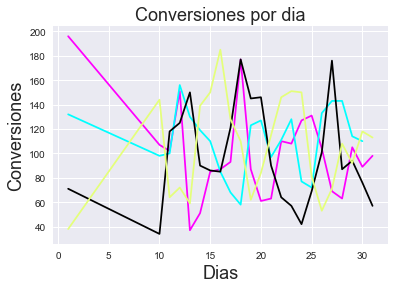

In [36]:
octubre = octubre[['dia','Conversion_label']]
octu = octubre.groupby('dia')['Conversion_label'].count()
octu.plot(x=octu.index , y = octu.values, cmap = "spring")

noviembre = noviembre[['dia','Conversion_label']]
novi = noviembre.groupby('dia')['Conversion_label'].count()
novi.plot(x=novi.index , y = novi.values, cmap = "cool")

diciembre = diciembre[['dia','Conversion_label']]
dici = diciembre.groupby('dia')['Conversion_label'].count()
dici.plot(x=dici.index , y = dici.values, cmap = "bone")

enero = enero[['dia','Conversion_label']]
ener = enero.groupby('dia')['Conversion_label'].count()
ener.plot(x=ener.index , y = ener.values, cmap = "Wistia")


plt.title('Conversiones por dia', fontsize = 18)
plt.xlabel('Dias', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 18)

Rosa (octubre), azul (noviembre), negro (diciembre), amarillo (enero)

Para una mejor precisión, se obtiene las horas con mayor conversión

Se crea la columna de hora

In [38]:
df_meses['hora'] = df_meses['Conversion_date_hour'].dt.hour

Se filtra por contratación

In [39]:
contratacionOK = df_meses[(df_meses['Conversion_label'] == '16_ContratacionOK')]

In [40]:
convOK = contratacionOK[['Conversion_label','hora']].groupby('hora')['Conversion_label'].count()
convOK

hora
0     593
1     274
2     219
3     101
4     118
5      60
6      86
7     159
8     258
9     430
10    726
11    807
12    948
13    899
14    843
15    884
16    861
17    834
18    774
19    824
20    793
21    682
22    377
23    425
Name: Conversion_label, dtype: int64

Conversión en función de horas


In [41]:
labels = convOK.index
stats = np.log(convOK.values)

def drawRadarChart(labels,stats,title):
  

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)

    ax.grid(True)

    fig.text(0.5, 1.00, title,horizontalalignment='center', color='black', weight='bold', size='large')

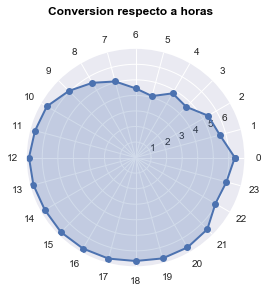

In [42]:
drawRadarChart(labels = labels, stats =stats, title = "Conversion respecto a horas")